# Python lecture6-7/ AI CLUB / Syrian Computer Society

# House Sales in King County, USA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
file_name='D:\\hp.csv'
df=pd.read_csv(file_name)

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df.shape

(21613, 22)

In [7]:
df.loc[3]

Unnamed: 0                     3
id                    2487200875
date             20141209T000000
price                   604000.0
bedrooms                     4.0
bathrooms                    3.0
sqft_living                 1960
sqft_lot                    5000
floors                       1.0
waterfront                     0
view                           0
condition                      5
grade                          7
sqft_above                  1050
sqft_basement                910
yr_built                    1965
yr_renovated                   0
zipcode                    98136
lat                      47.5208
long                    -122.393
sqft_living15               1360
sqft_lot15                  5000
Name: 3, dtype: object

In [8]:
df1=df.loc[:, ["bedrooms", "price"]]
df1.head()

,bedrooms,price
0,3.0,221900.0
1,3.0,538000.0
2,2.0,180000.0
3,4.0,604000.0
4,3.0,510000.0


In [9]:
df2=df.iloc[:, [4,3]]
df2.head()

,bedrooms,price
0,3.0,221900.0
1,3.0,538000.0
2,2.0,180000.0
3,4.0,604000.0
4,3.0,510000.0


In [10]:
s=df.loc[2,'price']
print(s)

180000.0


In [11]:
condition=df['floors']==1.0
print(condition)

0         True
1        False
2         True
3         True
4         True
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Name: floors, Length: 21613, dtype: bool


In [12]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#  Data Wrangling

In [13]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df.drop(['id'], axis=1, inplace=True)

In [16]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [18]:
mean1=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean1, inplace=True)
mean2=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean2, inplace=True)

In [19]:
print("number of NaN values for the column bedrooms after wrangling:", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms after wrangling :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms after wrangling: 0
number of NaN values for the column bathrooms after wrangling : 0


#  Exploratory Data Analysis

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.


In [20]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


#  Model Development

In [21]:
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
regr3= linear_model.LinearRegression()

In [22]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)



In [23]:
regr.fit (x_train,y_train)

LinearRegression()

In [40]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [-2.93756143e+04  5.68375222e+05  6.77971164e+05 -2.57800977e+04
  6.89878587e+13  6.93481110e+04 -1.87277909e+03 -2.25028472e+00
  6.89878587e+13  8.08827379e+04 -6.89878587e+13]
Intercept:  -32616132.765445538


In [25]:
y_hat= regr.predict(x_test)

In [26]:
from sklearn.metrics import r2_score

In [27]:
print("R2-score: %.2f" % r2_score(y_test,y_hat) )


R2-score: 0.65


In [28]:
features2=["bathrooms"]    
X2 = df[features2]
Y2 = df['price']

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.15, random_state=1)


In [29]:
regr2.fit (x2_train,y2_train)

LinearRegression()

In [30]:
y_hat2= regr2.predict(x2_test)

In [39]:
print ('Coefficient: ', regr2.coef_)
print ('Intercept: ',regr.intercept_)

Coefficient:  [250619.77226007]
Intercept:  -32616132.765445538


In [32]:
print("R2-score: %.2f" % r2_score(y2_test,y_hat2) )

R2-score: 0.26


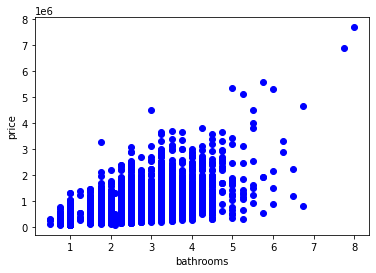

In [33]:
plt.scatter(x2_train,y2_train,  color='blue')
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.show()

In [34]:
features3=["yr_built"]    
X3 = df[features3]
Y3 = df['price']

x3_train, x3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.15, random_state=1)
regr3.fit (x3_train,y3_train)
y_hat3= regr3.predict(x3_test)

In [38]:
print ('Coefficient: ', regr3.coef_)
print ('Intercept: ',regr.intercept_)

Coefficient:  [710.92535323]
Intercept:  -32616132.765445538


In [36]:
print("R2-score: %.2f" % r2_score(y3_test,y_hat3) )

R2-score: 0.00


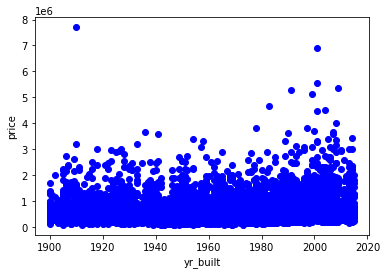

In [37]:
plt.scatter(x3_train,y3_train,  color='blue')
plt.xlabel("yr_built")
plt.ylabel("price")
plt.show()